# General information 
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
# импортируем модули, которые понадобятся для обработки данных
math = pd.read_csv('stud_math.csv')
# читаем файл

In [96]:
display(math.head(10)) # показать первые 10 строк датасета
math.info() # общая информация о данных

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4.0,3.0,6,30
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4,30
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10,50
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2,75
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4,50
5,GP,M,16.0,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10,75
6,GP,M,16.0,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0,55
7,GP,F,17.0,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6,30
8,GP,M,15.0,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,2.0,2.0,1.0,0,95
9,GP,M,15.0,U,GT3,T,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0,75


<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      351 non-null    object 
 1   sex         351 non-null    object 
 2   age         351 non-null    float64
 3   address     351 non-null    object 
 4   famsize     351 non-null    object 
 5   Pstatus     351 non-null    object 
 6   Medu        351 non-null    float64
 7   Fedu        351 non-null    float64
 8   Mjob        351 non-null    object 
 9   Fjob        351 non-null    object 
 10  reason      351 non-null    object 
 11  guardian    351 non-null    object 
 12  traveltime  351 non-null    float64
 13  studytime   351 non-null    float64
 14  failures    351 non-null    float64
 15  schoolsup   351 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        351 non-null    object 
 18  activities  351 non-null    object 
 19  nursery     351 non-null    o

In [97]:
pd.options.display.max_columns = None

На данном этапе можно сделать следующие наблюдения: 
1. 13 колонок с числовыми значениями и 17 с нечисловыми
2. Всего строк 395
3. Есть пропущенные значения и значения в виде NaN.

In [193]:
print(f'Всего в датасете {math.isnull().any().sum()} столбцов с пропущенными значениями.')
# посчитаем сколько колонок с пропущенными значениями

Всего в датасете 27 столбцов с пропущенными значениями.


# Визуализируем пропущенные значения с помощью тепловой карты

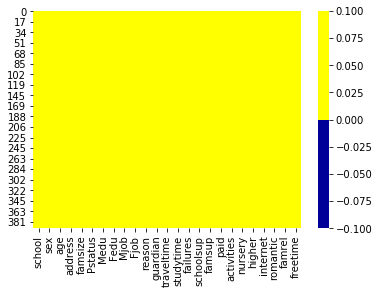

In [99]:
cols = math.columns[0:25]# не все столбцы потому, что свыше 25 на карту наносятся столбцы через 1( 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(math[cols].isnull(), cmap=sns.color_palette(colours))





 С помощью теловой карты не видно каких-то закономерностей в пропусках данных.  
 
 Составим список долей отсутствующих записей для каждого признака

In [192]:
for col in math.columns:
    pct_missing = np.mean(math[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
Pstatus - 11.0%
Medu - 1.0%
Fedu - 6.0%
Mjob - 5.0%
Fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
studytime, granular - 2.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


Самое большое количество пропусков в колонке статус совместного жилья родителей - 11 %

In [194]:
one_value_cols = [col for col in math.columns if math[col].nunique() <= 1]
print(f'Всего в датасете {len(one_value_cols)} столбцов с одним уникальным значением.')
# проверим есть ли колонки с одним уникальным значением (делаем для того, чтобы исключить колонку потому, 
# что она не будет влиять на целевую переменную)

Всего в датасете 0 столбцов с одним уникальным значением.


In [102]:
# отбор числовых колонок
math_numeric = math.select_dtypes(include=[np.number])
numeric_cols = math_numeric.columns.values
print(numeric_cols)

['age' 'Medu' 'Fedu' 'traveltime' 'studytime' 'failures' 'famrel'
 'freetime' 'goout' 'health' 'absences' 'score']


In [103]:
# отбор нечисловых колонок
math_non_numeric = math.select_dtypes(exclude=[np.number])
non_numeric_cols = math_non_numeric.columns.values
print(non_numeric_cols)

['school' 'sex' 'address' 'famsize' 'Pstatus' 'Mjob' 'Fjob' 'reason'
 'guardian' 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher'
 'internet' 'romantic']


# Далее первое, что бросается в глаза, что в описании к датасету указано 29 колонок, у нас же загружено 30. 
Лишняя "studytime, granular" ее значения непонятны (отрицательны).

Просмотрим все колонки подряд 


In [104]:
math['school'].value_counts(dropna=False, normalize=True) # исходя из описания к датасету 
# эта колонка содержит аббревиатуру школы. Сама по себе аббревиатура нам не интересна, 
# но может быть интересно процентное соотношение количества учеников.


GP    0.883191
MS    0.116809
Name: school, dtype: float64

Итак, в нашем датасете ученики из двух школ, причем количество учеников из школы GP значительно превышает количество учеников из школы MS.

Пропущенных значений нет. Данные в этой колонке относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента

In [105]:
math['sex'].value_counts(dropna=False, normalize=True) # ожидаем в данной колонке увидеть также 2 значения

F    0.51567
M    0.48433
Name: sex, dtype: float64

Всего два значения в столбце (что логично). В нашем датасете на 5 % больше девочек чем мальчиков. 

Пропущенных значений нет. Данные в этой колонке относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента

In [106]:
math['age'].value_counts() # исходя из описания к датасету - возраст ученика (от 15 до 22).
# Значения вне этого промежутка будем рассматривать как ошибочные

16.0    95
17.0    90
15.0    76
18.0    69
19.0    16
20.0     3
21.0     1
22.0     1
Name: age, dtype: int64

Действительно у нас данные об учениках в возрасте от 15 до 22 лет. Правда не понятно выполняется ли главная цель проекта (на РАННЕЙ стадии выявлять студентов, находящихся в группе риска) при наблюдении за лицами старше 18 лет. Что это за "ученики школы" в 22 года? является ли этот возраст ранней стадией? 

Пропущенных значений нет. Данные этой колонки относятся к числовым. Возможность их влияния на целевую переменную будем оценивать с помощью корреляционного анализа.

In [107]:
# Проверим данное распределение на нормальность
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = math.age
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.905, p=0.000
Sample does not look Gaussian (reject H0)


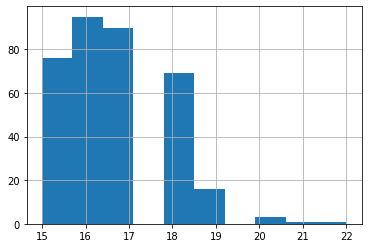

In [108]:
math['age'].hist()

Представленное графическое изображение данных столбца age не напоминает "колокол"...

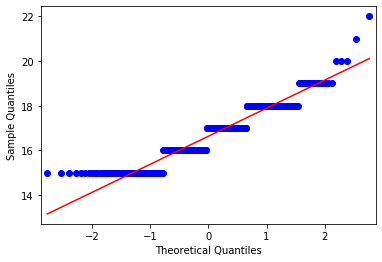

In [109]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = math.age
# q-q plot
qqplot(data, line='s')
pyplot.show()

Набор наших данных не соответствует ожидаемому диагональному шаблону. Отклонения по точкам от линии показывают отклонение от ожидаемого распределения.

Делаем вывод о том, что распределение не нормальное.

In [110]:
math['age'] = math['age'].astype('int')
# Учитывая, что данные о возрасте выражены в целых числах, приведем их значения в формат int
math['age'].value_counts()

16    95
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

In [111]:
math['address'].value_counts(dropna=False, normalize=True) # исходя из описания к датасету - тип адреса ученика ('U' - городской, 'R' - за городом).


U    0.777778
R    0.222222
Name: address, dtype: float64

В целом в нашем датасете больше городских жителей чем иногородних (примерно на 53%). 

У нас есть пропущенные значения (около 4 %). Возможно имеет смысл попробовать заполнить пропуски руководствуясь значением другой колонки - "traveltime". 

Необходимо проанализировать за сколько в среднем добираются до школы городские жители.

In [112]:
math[(math.address == 'U')].traveltime.describe()

 # посмотрим на значения в столбце traveltime.

count    273.000000
mean       1.300366
std        0.573207
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

У нас много пропущенных значений, но в целом можно сделать вывод что среднее значение находится в промежутке между 1 и 2. Исходя из описания к датасету значение 1 соответствует времени <15 мин. значение 2 - 15-30 мин. 

In [113]:
r_mean_time =  math.groupby('address')['traveltime'].mean().loc['R']
u_mean_time =  math.groupby('address')['traveltime'].mean().loc['U']
for i in math[math.address.isna()].index:
    if not np.isnan(math.traveltime.loc[i]):
        if abs(math.traveltime.loc[i] - r_mean_time) < abs(math.traveltime.loc[i] - u_mean_time):
            math.address.loc[i] = 'R'
        else:
            math.address.loc[i] = 'U'
# заменим пропущенные значения

In [114]:
math['address'].value_counts(dropna=False)
# проверяем ...

U    273
R     78
Name: address, dtype: int64

Осталось 3 пропущенных значения... предположим, что это городские жители.

In [115]:
math.address = math.address.fillna('U')
# замена последних 3 пропущенных значений

In [116]:
math['famsize'].value_counts(dropna=False, normalize=True)

GT3    0.7151
LE3    0.2849
Name: famsize, dtype: float64

Всего два уникальных значения в данной колонке. Размер семьи('LE3' <= 3, 'GT3' >3). Больше всего школьников проживает в семьях состоящих из более чем 3х человек. 

Есть пропущенные значения 27 единиц. Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента

In [198]:
math.famsize = math.famsize.fillna('GT3')
# замена пропущенных значений на самое распространенное

In [118]:
math['Pstatus'].value_counts(dropna=False, normalize=True) 

T    0.903134
A    0.096866
Name: Pstatus, dtype: float64

Всего два уникальных значения в данной колонке. Cтатус совместного жилья родителей ('T' - живут вместе 'A' - раздельно). Больше всего школьников проживает в семьях где родители живут совместно. 

Есть пропущенные значения. Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента

In [119]:
math.Pstatus = math.Pstatus.fillna('T')
# замена пропущенных значений на самое распространенное

In [120]:
math['Medu'].value_counts(dropna=False, normalize=True) 

4.0    0.356125
3.0    0.253561
2.0    0.247863
1.0    0.133903
0.0    0.008547
Name: Medu, dtype: float64

Не нравится, что данные в этой колонке представлены в формате float. Переведем их в int и заменим пропуски на медианное значение.

In [121]:
math.Medu = math.Medu.fillna(math.Medu.median())
math['Medu'] = math['Medu'].astype('int')

Проверим...

In [122]:
math['Medu'].value_counts(dropna=False, normalize=True) 

4    0.356125
3    0.253561
2    0.247863
1    0.133903
0    0.008547
Name: Medu, dtype: float64

В итоге у нас нет пропусков и все значения в формате int.

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [123]:
math['Fedu'].value_counts(dropna=False, normalize=True)  

2.0    0.327635
3.0    0.250712
4.0    0.230769
1.0    0.185185
0.0    0.005698
Name: Fedu, dtype: float64

У нас есть очевидная ошибка - значение равное 40. Переведем его в 4 и повторим предыдущее упражнение...

In [124]:
math.loc[math["Fedu"] == 40.0,"Fedu"] = 4
math.Fedu = math.Fedu.fillna(math.Fedu.median())
math['Fedu'] = math['Fedu'].astype('int')

In [125]:
math['Fedu'].value_counts(dropna=False, normalize=True) 

2    0.327635
3    0.250712
4    0.230769
1    0.185185
0    0.005698
Name: Fedu, dtype: float64

В итоге у нас нет пропусков и все значения в формате int.

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [126]:
math['Mjob'].value_counts(dropna=False, normalize=True)  

other       0.327635
services    0.253561
at_home     0.188034
teacher     0.145299
health      0.085470
Name: Mjob, dtype: float64

In [127]:
math.Mjob = math.Mjob.fillna('at_home')
# Заменим пропущенные значения на медиану 

Всего 2 уникальных значения в столбце. Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot , а также теста Стьюдента.

In [128]:
math['Fjob'].value_counts(dropna=False, normalize=True)  

other       0.592593
services    0.253561
teacher     0.071225
health      0.042735
at_home     0.039886
Name: Fjob, dtype: float64

In [129]:
math.Fjob = math.Fjob.fillna('other')
# Заполним пропущенные значения самым популярным

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot , а также теста Стьюдента.

In [130]:
math['reason'].value_counts(dropna=False, normalize=True)   

course        0.381766
reputation    0.273504
home          0.253561
other         0.091168
Name: reason, dtype: float64

In [131]:
math.reason = math.reason.fillna('course')
# Заполним пропущенные значения самым популярным

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [132]:
math['guardian'].value_counts(dropna=False, normalize=True)   

mother    0.720798
father    0.222222
other     0.056980
Name: guardian, dtype: float64

In [133]:
math.guardian = math.guardian.fillna('mother')
# Заполним пропущенные значения самым популярным

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [134]:
math['traveltime'].value_counts(dropna=False, normalize=True)   

1.0    0.686610
2.0    0.245014
3.0    0.048433
4.0    0.019943
Name: traveltime, dtype: float64

In [135]:
math.traveltime = math.traveltime.fillna(math.traveltime.median())
math['traveltime'] = math['traveltime'].astype('int')
# Заполним пропущенные значения на медиану
# и переведем значения в формат int

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [136]:
math['studytime'].value_counts(dropna=False, normalize=True) 

2.0    0.509972
1.0    0.256410
3.0    0.165242
4.0    0.068376
Name: studytime, dtype: float64

In [137]:
math.studytime = math.studytime.fillna(math.studytime.median())
math['studytime'] = math['studytime'].astype('int')

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [138]:
math['failures'].value_counts(dropna=False, normalize=True) 

0.0    0.831909
1.0    0.108262
2.0    0.031339
3.0    0.028490
Name: failures, dtype: float64

In [139]:
math.failures = math.failures.fillna(math.failures.median())
math['failures'] = math['failures'].astype('int')

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [140]:
math['schoolsup'].value_counts(dropna=False, normalize=True) 

no     0.866097
yes    0.133903
Name: schoolsup, dtype: float64

In [141]:
math.schoolsup = math.schoolsup.fillna('no')

Всего 2 уникальных значения. Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [142]:
math['famsup'].value_counts(dropna=False, normalize=True) 

yes    0.65812
no     0.34188
Name: famsup, dtype: float64

In [143]:
math.famsup = math.famsup.fillna('yes')

Всего 2 уникальных значения. Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [144]:
math['paid'].value_counts(dropna=False, normalize=True)

no     0.584046
yes    0.415954
Name: paid, dtype: float64

In [145]:
math.paid = math.paid.fillna('no')

Всего 2 уникальных значения. Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [146]:
math['activities'].value_counts(dropna=False, normalize=True)

yes    0.524217
no     0.475783
Name: activities, dtype: float64

In [147]:
math.activities = math.activities.fillna('yes')

Всего 2 уникальных значения. Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [148]:
math['nursery'].value_counts(dropna=False, normalize=True)

yes    0.806268
no     0.193732
Name: nursery, dtype: float64

In [149]:
math.nursery = math.nursery.fillna('yes')

Всего 2 уникальных значения. Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [150]:
math['higher'].value_counts(dropna=False, normalize=True)

yes    0.908832
no     0.091168
Name: higher, dtype: float64

In [151]:
math.higher = math.higher.fillna('no')

Всего 2 уникальных значения. Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [152]:
math['internet'].value_counts(dropna=False, normalize=True)

yes    0.777778
no     0.222222
Name: internet, dtype: float64

In [153]:
math.internet = math.internet.fillna('no')

Всего 2 уникальных значения. Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [154]:
math['romantic'].value_counts(dropna=False, normalize=True)

no     0.703704
yes    0.296296
Name: romantic, dtype: float64

In [155]:
math.romantic = math.romantic.fillna('no')

Всего 2 уникальных значения. Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [156]:
math['famrel'].value_counts(dropna=False, normalize=True)

4.0    0.532764
5.0    0.250712
3.0    0.159544
2.0    0.037037
1.0    0.019943
Name: famrel, dtype: float64

In [157]:
math['famrel'] = math['famrel'].replace(-1, 1) 
# замена ошибочного значения 

In [158]:
math.famrel = math.famrel.fillna(math.famrel.median())
# замена пропусков на медиану
math['famrel'] = math['famrel'].astype('int')
# перевод формата данных

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [159]:
math['freetime'].value_counts(dropna=False, normalize=True)

3.0    0.396011
4.0    0.290598
2.0    0.168091
5.0    0.099715
1.0    0.045584
Name: freetime, dtype: float64

In [160]:
math.freetime = math.freetime.fillna(math.freetime.median())
math['freetime'] = math['freetime'].astype('int')

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [161]:
math['goout'].value_counts(dropna=False, normalize=True)

3.0    0.353276
2.0    0.262108
4.0    0.210826
5.0    0.122507
1.0    0.051282
Name: goout, dtype: float64

In [162]:
math.goout = math.goout.fillna(math.goout.median())
math['goout'] = math['goout'].astype('int')

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [163]:
math['health'].value_counts(dropna=False, normalize=True)

5.0    0.353276
3.0    0.227920
4.0    0.188034
1.0    0.128205
2.0    0.102564
Name: health, dtype: float64

In [164]:
math.health = math.health.fillna(math.health.median())
math['health'] = math['health'].astype('int')

Данные этой колонки относятся к категориальным. Выявлять возможность их влияния на целевую переменную будем с помощью box-plot или KDE-plot, а также теста Стьюдента.

In [165]:
math['absences'].value_counts(dropna=False, normalize=True)

0      0.210826
4      0.176638
2      0.170940
6      0.085470
8      0.056980
10     0.048433
14     0.034188
12     0.034188
16     0.019943
3      0.019943
7      0.017094
5      0.014245
18     0.014245
20     0.011396
9      0.008547
22     0.008547
1      0.008547
11     0.005698
13     0.005698
15     0.005698
212    0.002849
75     0.002849
19     0.002849
21     0.002849
23     0.002849
24     0.002849
25     0.002849
26     0.002849
28     0.002849
30     0.002849
38     0.002849
40     0.002849
54     0.002849
56     0.002849
17     0.002849
Name: absences, dtype: float64

count    351.000000
mean       6.900285
std       13.703754
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      212.000000
Name: absences, dtype: float64

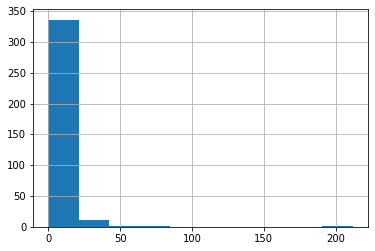

In [166]:
math.absences.hist()
math.absences.describe()

In [167]:
# определение границ выбросов
median = math.absences.median()
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


Несмотря на то, что границей выбросов является 20 пропущенных занятий представляется целесообразным оставить без внимания только невозможное значение - 385 занятий. 
 
 Данные этой колонки относятся к числовым. Возможность их влияния на целевую переменную будем оценивать с помощью корреляционного анализа.

In [168]:
math.absences = math.absences.fillna(math.absences.median())
math[(math.absences == 385)] = math[(math.absences == math.absences.median())]
math['absences'] = math['absences'].astype('int')

Нет пропущенных значений. Все значения переведены в формат int

In [169]:
math['score'].value_counts(dropna=False, normalize=True)

50     0.153846
55     0.131054
75     0.094017
60     0.088319
65     0.088319
40     0.088319
70     0.076923
45     0.076923
80     0.045584
30     0.042735
90     0.034188
35     0.025641
25     0.019943
85     0.014245
95     0.014245
100    0.002849
20     0.002849
Name: score, dtype: float64

In [170]:
math = math.drop(math[(math.score == 0.0)].index)
# нас не интересуют значения равные 0, т.к. судя по всему это значения тех кто экзамен не сдавал.
math = math.dropna(axis='index', how='any', subset=['score'])
# пропущенные значения нам также не нужны.

In [171]:
math['score'] = math['score'].astype('int')

In [172]:
math['score'].describe()

count    351.000000
mean      57.678063
std       16.158379
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

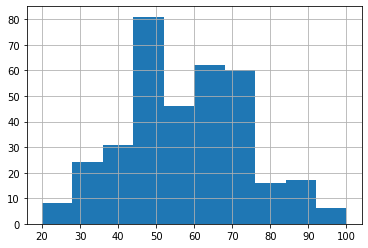

In [173]:
math['score'].hist()

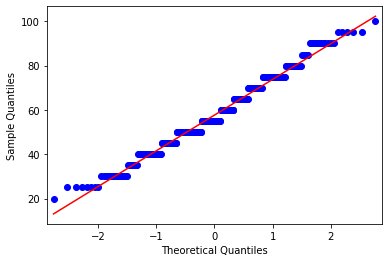

In [174]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = math.score
# q-q plot
qqplot(data, line='s')
pyplot.show()

In [175]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = math.score
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.981, p=0.000
Sample does not look Gaussian (reject H0)


Делаем вывод о том, что распределение не нормальное.

In [176]:
# проведем корреляционный анализ
math.corr().round(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.00,-0.12,-0.12,0.10,-0.01,0.24,0.07,0.00,0.12,-0.06,0.24,-0.13
Medu,-0.12,1.00,0.57,-0.16,0.07,-0.21,-0.01,0.02,0.08,-0.05,0.01,0.19
Fedu,-0.12,0.57,1.00,-0.12,-0.01,-0.25,-0.01,-0.04,0.04,0.00,-0.01,0.12
traveltime,0.10,-0.16,-0.12,1.00,-0.10,0.08,-0.03,-0.02,0.04,-0.02,-0.02,-0.07
studytime,-0.01,0.07,-0.01,-0.10,1.00,-0.15,0.05,-0.13,-0.03,-0.08,-0.05,0.14
failures,0.24,-0.21,-0.25,0.08,-0.15,1.00,-0.01,0.12,0.12,0.06,0.19,-0.29
famrel,0.07,-0.01,-0.01,-0.03,0.05,-0.01,1.00,0.15,0.03,0.11,0.02,0.05
freetime,0.00,0.02,-0.04,-0.02,-0.13,0.12,0.15,1.00,0.29,0.07,0.03,-0.01
goout,0.12,0.08,0.04,0.04,-0.03,0.12,0.03,0.29,1.00,-0.01,0.06,-0.17
health,-0.06,-0.05,0.00,-0.02,-0.08,0.06,0.11,0.07,-0.01,1.00,0.00,-0.08


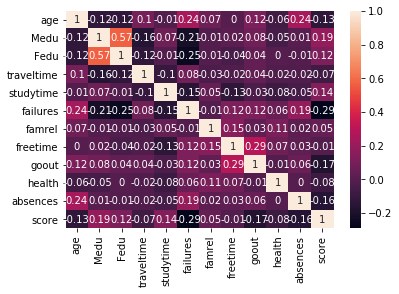

In [177]:
sns.heatmap(math.corr().round(2), annot = True)
# тепловая карта по результатам корреляцонного анализа

In [178]:
math.drop(['studytime, granular'], axis='columns', inplace=True)
# удалим столбец который абсолютно скоррелирован со столбцом "studytime"


KeyError: "['studytime, granular'] not found in axis"

Проверим удалялся ли столбец

In [189]:
display(math.head(10)) # показать первые 10 строк датасета
math.info() # общая информация о данных

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,3,6,30
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4,30
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,no,no,yes,yes,yes,no,4,3,2,3,10,50
3,GP,F,15,U,GT3,T,4,2,health,other,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,5,2,75
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4,50
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,5,10,75
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,3,0,55
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,6,30
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,0,95
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,5,0,75


<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      351 non-null    object
 1   sex         351 non-null    object
 2   age         351 non-null    int32 
 3   address     351 non-null    object
 4   famsize     351 non-null    object
 5   Pstatus     351 non-null    object
 6   Medu        351 non-null    int32 
 7   Fedu        351 non-null    int32 
 8   Mjob        351 non-null    object
 9   Fjob        351 non-null    object
 10  reason      351 non-null    object
 11  guardian    351 non-null    object
 12  traveltime  351 non-null    int32 
 13  studytime   351 non-null    int32 
 14  failures    351 non-null    int32 
 15  schoolsup   351 non-null    object
 16  famsup      351 non-null    object
 17  paid        351 non-null    object
 18  activities  351 non-null    object
 19  nursery     351 non-null    object
 20  higher    

In [179]:
# проведем анализ категориальных и номинативных данных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

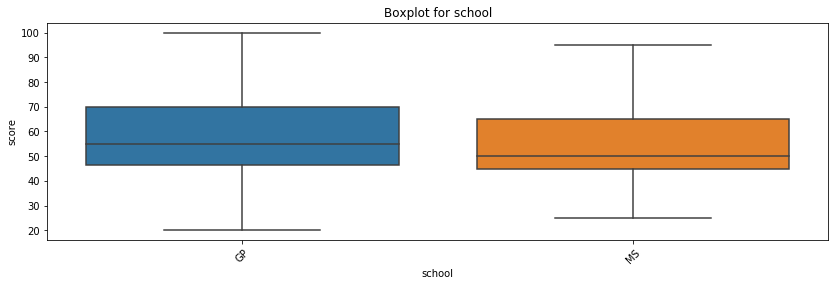

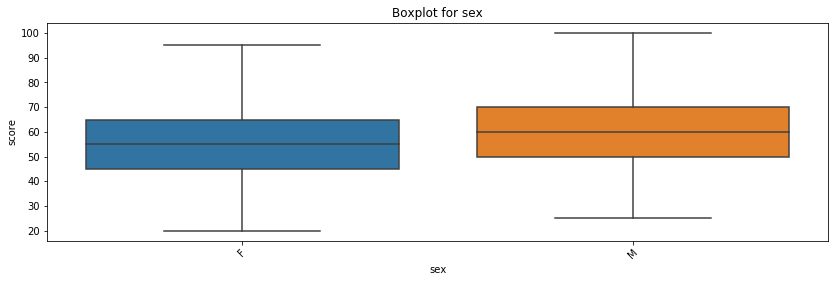

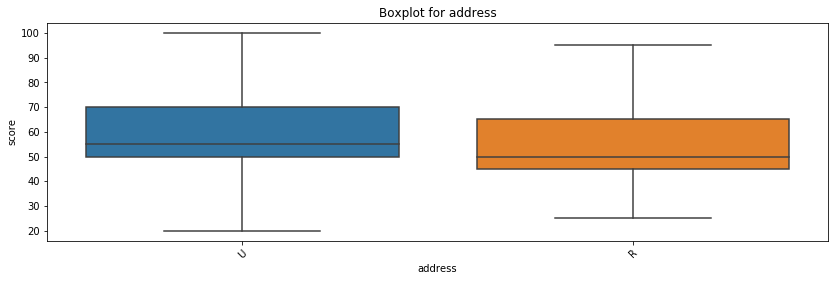

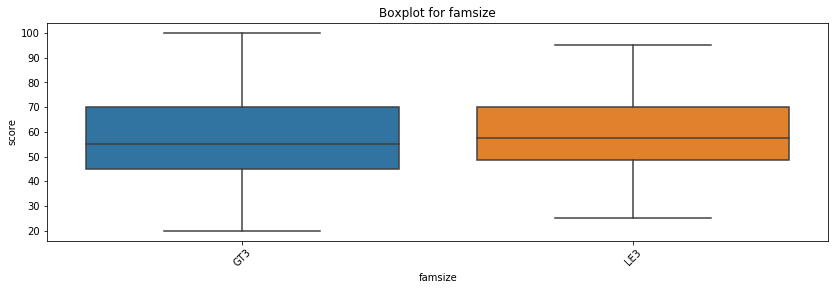

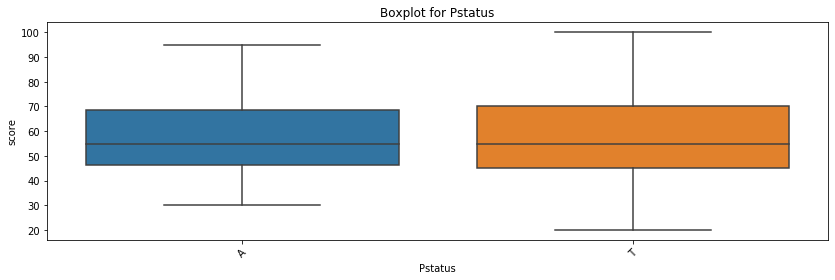

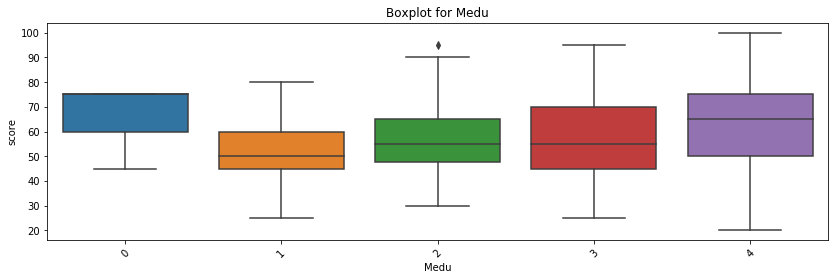

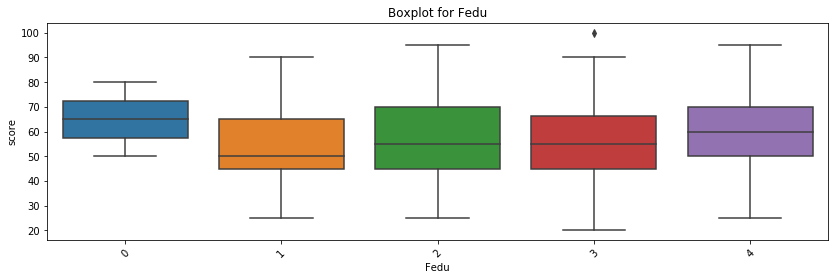

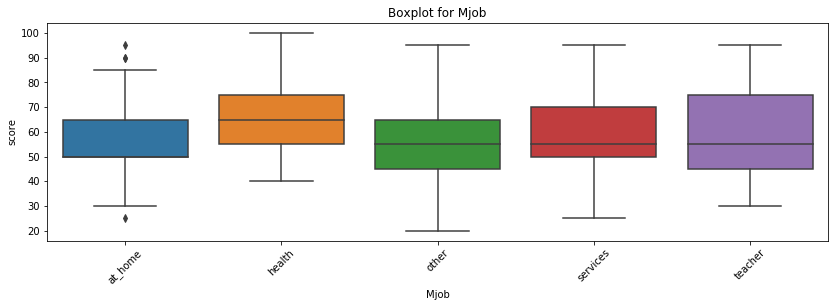

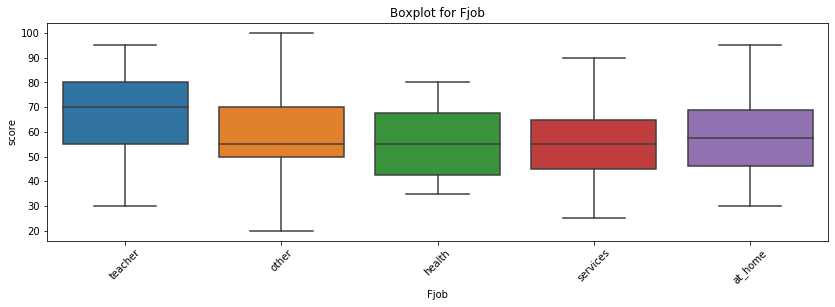

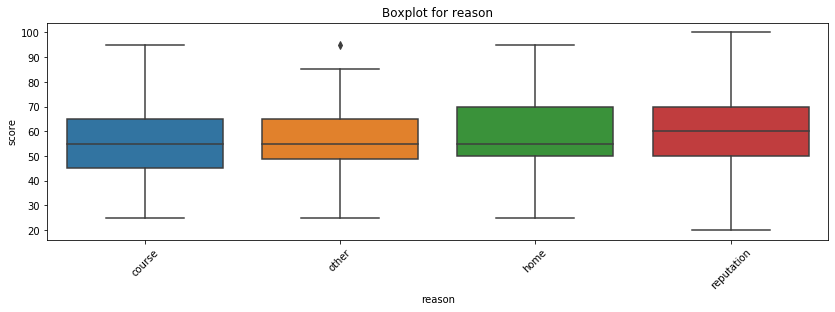

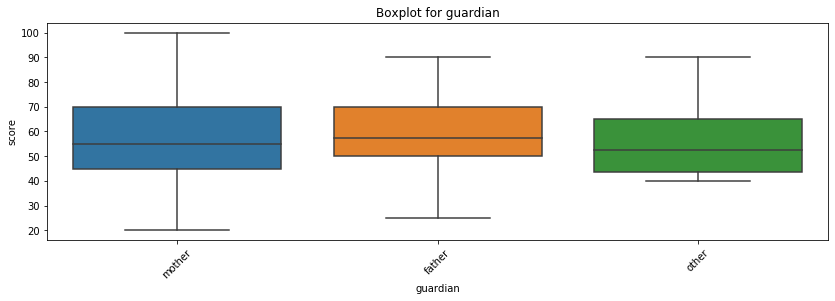

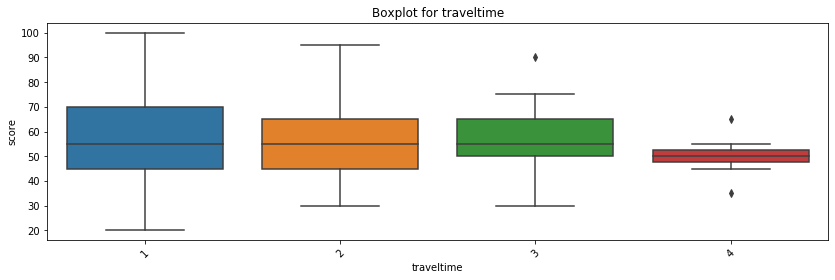

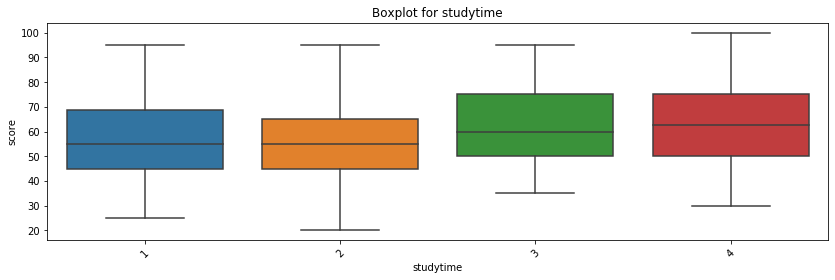

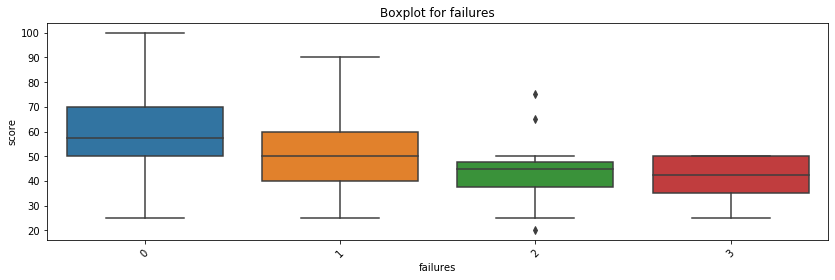

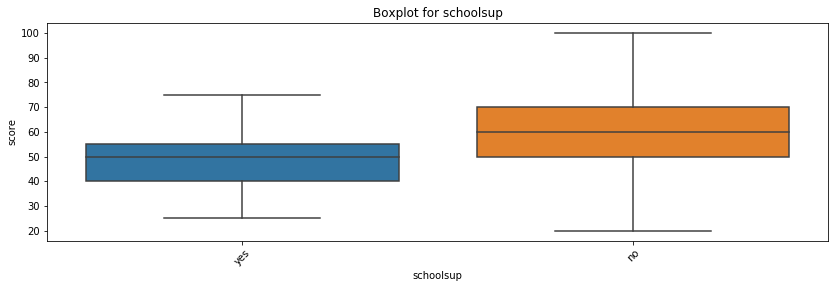

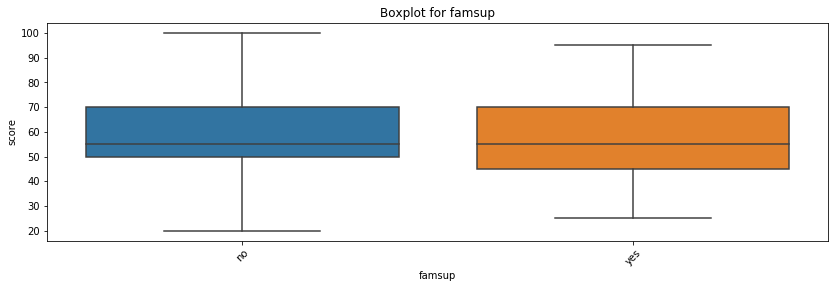

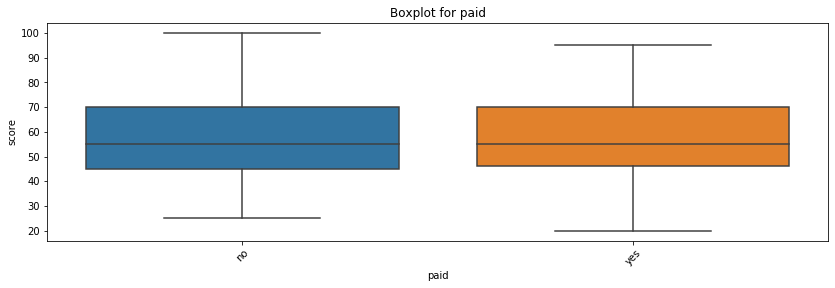

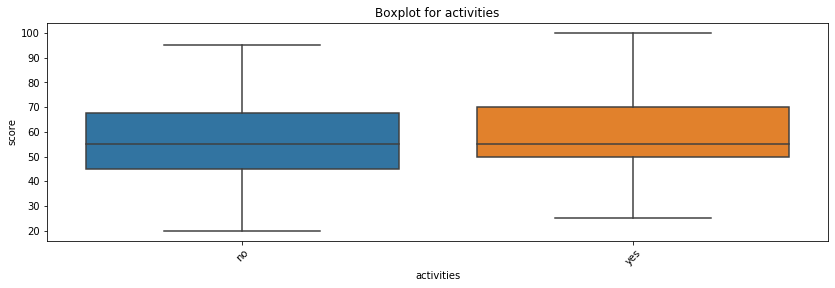

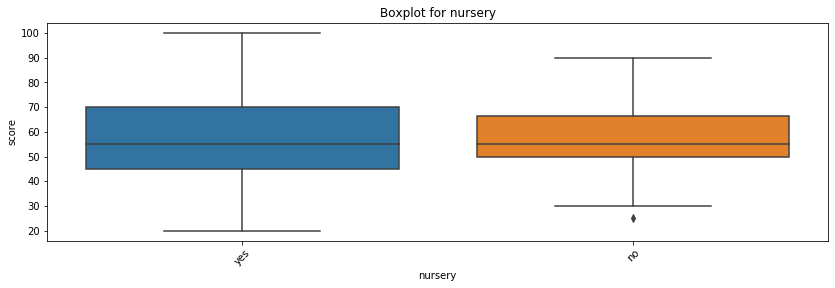

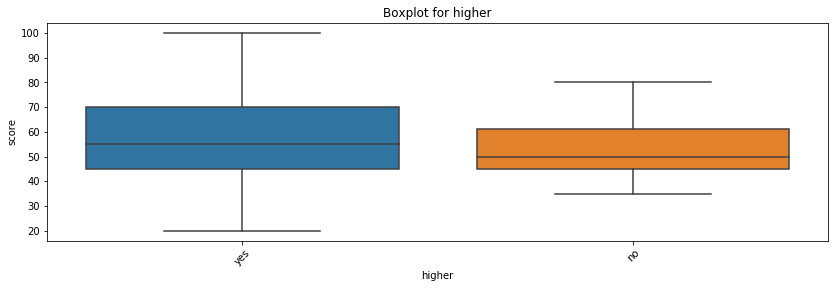

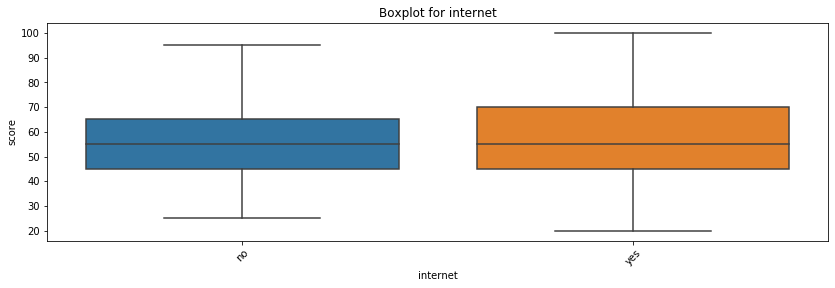

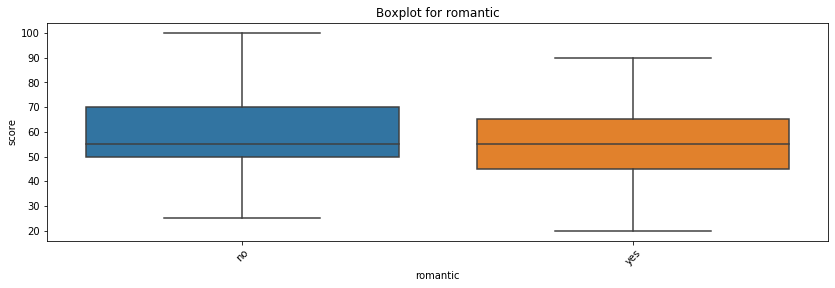

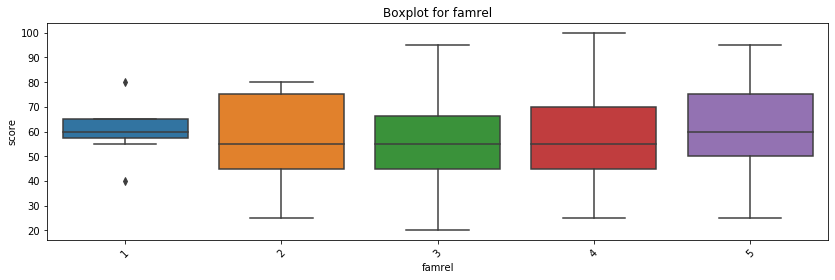

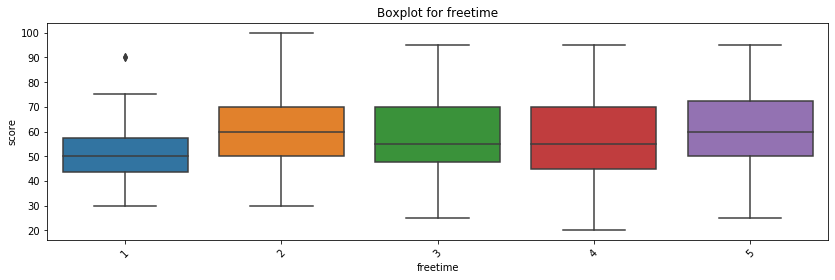

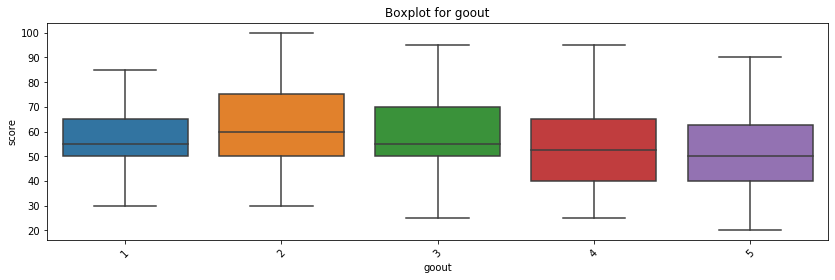

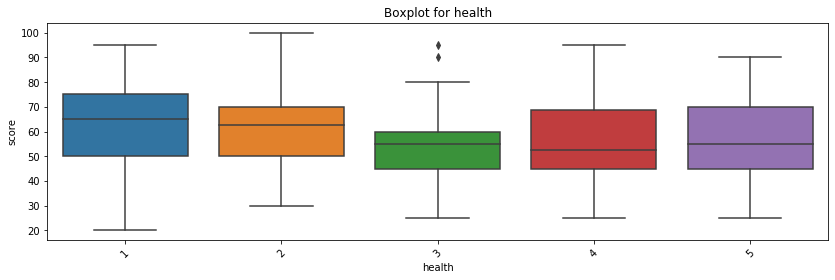

In [180]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

Итак, исходя из представленной визуализцаии, столбцы которые оказывают влияние на результат тестирования:
    1. school
    2. sex
    3. address
    4. Medu
    5. Fedu
    6. Mjob
    7. Fjob
    8. guardian
    9. traveltime
    10. studytime
    11. failures
    12. schoolsup
    13. higher
    14. internet
    15. romantic
    16. famrel
    17. freetime
    18. goout
    19. health

По графикам похоже, что такие столбцы как 'famsize', 'Pstatus', 'reason', 'famsup', 'paid', 'activities', 'nursery' не влияют на значение целевой переменной. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным и категориальным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения результатов экзамена по различным параметрам неразличимы:

In [181]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], math.loc[math.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [182]:
for cols in ['school', 'sex', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(cols)
# рассматриваем отдельно номинативные переменные 

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


In [ ]:
# Таким образом необходимо очитстить наш датасет от ненужной информации.
math.drop(['school', 'guardian', 'traveltime', 'higher', 'internet', 'romantic', 'famrel', 'freetime','health'], axis='columns', inplace=True)

Итак, в результате EDA для анализа влияния обстоятельств на результаты тестирования по математике были получены следующие выводы:
1. В данных достаточно много пустых значений. 27 столбцов из 30 имели пропущенные значения. В столбце Pstatus более 11 % значений пропущено.
2. Выбросы найдены только в столбце absences, что позволяет сделать вывод о том, что данные достаточно чистые. В столбце с целевой переменной найдены значения равные 0, что говорит либо о том, что студент не явился на экзамен, либо о технической ошибке. Такие значения были заменены на медианное значение.
3. Установлена отрицательная корреляция параметра age и score, что может быть связано с различными факторами, так, например, увеличение образовательной нагрузки, желание проводить больше времени со сверстниками (об этом также можно судить по положительной корреляции параметров age и absences) и т.д.
4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, absences, sex, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, goout.